In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [7]:
data = pd.read_csv('GOOG.csv', date_parser = True)
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
4701,2023-04-24,106.050003,107.320000,105.360001,106.779999,106.779999,21410900
4702,2023-04-25,106.610001,107.440002,104.559998,104.610001,104.610001,31408100
4703,2023-04-26,105.559998,107.019997,103.269997,104.449997,104.449997,37068200
4704,2023-04-27,105.230003,109.150002,104.419998,108.370003,108.370003,38235200
4705,2023-04-28,107.800003,108.290001,106.040001,108.220001,108.220001,23945500


In [8]:
data_training = data[data['Date']<'2022-06-01'].copy()
data_test = data[data['Date']>='2022-06-01'].copy()

In [9]:
data_training = data_training.drop(['Date', 'Adj Close'], axis = 1)

In [10]:
scaler = MinMaxScaler()
training = scaler.fit_transform(data_training)
training

array([[1.35039790e-04, 3.86337794e-04, 0.00000000e+00, 5.54588186e-05,
        5.43577158e-01],
       [3.03427861e-04, 1.22230316e-03, 7.66630177e-04, 1.39474206e-03,
        2.77885883e-01],
       [1.92727230e-03, 1.95501646e-03, 2.21039746e-03, 1.57790459e-03,
        2.22151354e-01],
       ...,
       [6.93339082e-01, 7.11533699e-01, 6.98981260e-01, 7.13847326e-01,
        1.82528850e-02],
       [7.18360328e-01, 7.37694336e-01, 7.26520746e-01, 7.44228274e-01,
        1.80323690e-02],
       [7.40386151e-01, 7.61533350e-01, 7.47012618e-01, 7.52594304e-01,
        3.09834409e-02]])

In [11]:
X_train = []
y_train = []

for i in range(60, training.shape[0]):
    X_train.append(training[i-60:i])
    y_train.append(training[i, 0])
    
X_train, y_train = np.array(X_train), np.array(y_train)

In [12]:
X_train.shape

(4417, 60, 5)

In [13]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

2023-04-29 22:16:19.771090: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-29 22:16:19.911674: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-29 22:16:19.912932: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-29 22:16:21.587254: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [14]:
regressor = Sequential()

regressor.add(LSTM(units = 60, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 5)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 120, activation = 'relu'))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

In [15]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 60)            15840     
                                                                 
 dropout (Dropout)           (None, 60, 60)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 60)            29040     
                                                                 
 dropout_1 (Dropout)         (None, 60, 60)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 80)            45120     
                                                                 
 dropout_2 (Dropout)         (None, 60, 80)            0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [16]:
regressor.compile(optimizer='adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs=20, batch_size=32)


Epoch 1/20
139/139 [==============================] - 26s 136ms/step - loss: 0.0083
Epoch 2/20
139/139 [==============================] - 19s 137ms/step - loss: 0.0016
Epoch 3/20
139/139 [==============================] - 19s 134ms/step - loss: 0.0012
Epoch 4/20
139/139 [==============================] - 19s 135ms/step - loss: 0.0014
Epoch 5/20
139/139 [==============================] - 19s 135ms/step - loss: 0.0010
Epoch 6/20
139/139 [==============================] - 19s 133ms/step - loss: 0.0011
Epoch 7/20
139/139 [==============================] - 19s 135ms/step - loss: 9.0481e-04
Epoch 8/20
139/139 [==============================] - 19s 134ms/step - loss: 8.5527e-04
Epoch 9/20
139/139 [==============================] - 19s 134ms/step - loss: 0.0010
Epoch 10/20
139/139 [==============================] - 19s 134ms/step - loss: 8.7138e-04
Epoch 11/20
139/139 [==============================] - 19s 134ms/step - loss: 8.1554e-04
Epoch 12/20
139/139 [==============================] - 19s

In [17]:
data_test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
4477,2022-06-01,114.931503,117.399002,113.550499,114.137001,114.137001,28630000
4478,2022-06-02,114.188004,117.898003,113.307999,117.746002,117.746002,27472000
4479,2022-06-03,115.992500,116.364502,113.667999,114.564003,114.564003,25052000
4480,2022-06-06,116.742500,119.398499,116.528297,117.010498,117.010498,23786000
4481,2022-06-07,115.648003,117.748650,115.125504,117.229500,117.229500,26414000


In [18]:
past_60_days = data_training.tail(60)

In [19]:
df = past_60_days.append(data_test, ignore_index = True)
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

/tmp/ipykernel_18160/245460817.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = past_60_days.append(data_test, ignore_index = True)


,Open,High,Low,Close,Volume
0,131.904007,131.904007,126.410004,126.464500,39178000
1,126.250504,131.246506,125.860748,127.278503,35250000
2,131.399994,134.198502,130.087997,133.865997,32258000
3,131.462494,133.538498,131.401001,132.682007,24266000
4,133.999496,134.199997,130.296494,130.475494,26600000


In [20]:
inputs = scaler.transform(df)
inputs

array([[0.8663961 , 0.86496932, 0.84082781, 0.83642685, 0.02363856],
       [0.82855294, 0.86057326, 0.83710398, 0.84191877, 0.02125893],
       [0.86302236, 0.88031034, 0.86576379, 0.88636338, 0.01944634],
       ...,
       [0.69005579, 0.69859455, 0.6839437 , 0.68789907, 0.02236042],
       [0.68784688, 0.71283579, 0.69174045, 0.71434662, 0.0230674 ],
       [0.70504983, 0.70708581, 0.70272371, 0.71333459, 0.01441052]])

In [21]:
X_test = []
y_test = []

for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    y_test.append(inputs[i, 0])

X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((229, 60, 5), (229,))

In [22]:
y_pred = regressor.predict(X_test)

8/8 [==============================] - 2s 53ms/step


In [23]:
scaler.scale_

array([6.69375383e-03, 6.68601135e-03, 6.77977800e-03, 6.74681491e-03,
       6.05813073e-10])

In [57]:
scale = 1/6.69375383e-03
scale

149.39300509053825

In [58]:
y_pred = y_pred*scale
y_test = y_test*scale

#### Calculation of Error

In [59]:
error = 0
length = len(y_pred)

for i in range(length):
    error = abs(y_test[i] - y_pred[i])/(y_test[i])

error = error/length
error = error*100*scale
error

array([3.6016958], dtype=float32)

#### calculation of f1-score

In [60]:
from sklearn.metrics import f1_score

In [61]:
def calculate_f1_score(actual_prices, predicted_prices):
    # Convert the price arrays into binary labels (1: increase, 0: decrease)
    actual_labels = [1 if actual_prices[i+1] > actual_prices[i] else 0 for i in range(len(actual_prices) - 1)]
    predicted_labels = [1 if predicted_prices[i+1] > predicted_prices[i] else 0 for i in range(len(predicted_prices) - 1)]
    
    # Calculate the F1-score
    f1 = f1_score(actual_labels, predicted_labels)
    return f1

In [62]:
f1_score = calculate_f1_score(y_test, y_pred)
print("F1-score:", f1_score)

F1-score: 0.46846846846846846


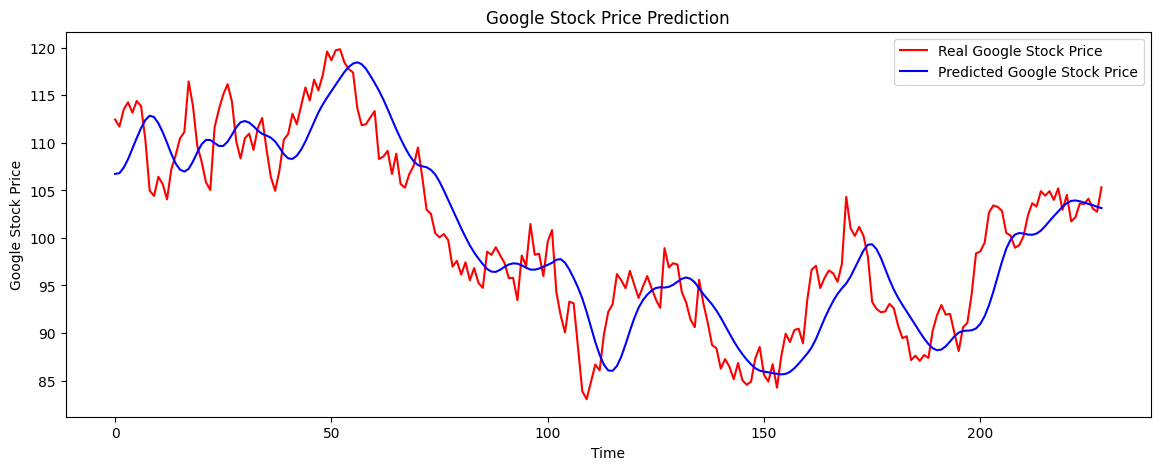

In [101]:
# Visualising the results
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Real Google Stock Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()